In [1]:
!pip install nltk

In [2]:

from gensim.models import Word2Vec

from nltk.cluster import KMeansClusterer
import nltk
import numpy as np
import gensim

import re
#import csv
from sklearn import cluster
from sklearn import metrics
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

#firebat=open('F:\MLWS\hirebat5.csv','rt',encoding='utf-8')
#redir=csv.reader((line.replace('\0',' ') for line in firebat))

data = pd.read_csv('F:\MLWS\minority_report.csv', encoding='utf-8', dtype=str, keep_default_na=False)


In [3]:
print(data)

tmp=data.values.tolist()

samples=data


        Subject Object      Env
0    powerpoint   pptx     read
1    powerpoint   pptx    write
2    powerpoint   pptx  execute
3    powerpoint   docx     read
4    powerpoint   docx    write
..          ...    ...      ...
115        hwpp    mp4    write
116        hwpp    mp4  execute
117        hwpp    wmv     read
118        hwpp    wmv    write
119        hwpp    wmv  execute

[120 rows x 3 columns]


In [4]:
sentenceses=tmp

In [5]:
w2v = gensim.models.word2vec.Word2Vec(sentences=sentenceses,size=1000, window=2, min_count=2, workers=32, sg=1)

In [6]:
print(w2v.most_similar(positive=["hwpp"], topn=4))

[('txt', 0.05780284106731415), ('pptx', 0.04340863227844238), ('execute', 0.03557676076889038), ('excel', 0.030165869742631912)]


C:\Users\gggg8\Anaconda3\envs\tst\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [38]:
filename='F:\MLWS\word2vec.csv'
w2v.save(filename)

In [7]:
#def one_hot_encoding(word)
print(samples)
print(tmp)

        Subject Object      Env
0    powerpoint   pptx     read
1    powerpoint   pptx    write
2    powerpoint   pptx  execute
3    powerpoint   docx     read
4    powerpoint   docx    write
..          ...    ...      ...
115        hwpp    mp4    write
116        hwpp    mp4  execute
117        hwpp    wmv     read
118        hwpp    wmv    write
119        hwpp    wmv  execute

[120 rows x 3 columns]
[['powerpoint', 'pptx', 'read'], ['powerpoint', 'pptx', 'write'], ['powerpoint', 'pptx', 'execute'], ['powerpoint', 'docx', 'read'], ['powerpoint', 'docx', 'write'], ['powerpoint', 'docx', 'execute'], ['powerpoint', 'xlsx', 'read'], ['powerpoint', 'xlsx', 'write'], ['powerpoint', 'xlsx', 'execute'], ['powerpoint', 'hwp', 'read'], ['powerpoint', 'hwp', 'write'], ['powerpoint', 'hwp', 'execute'], ['powerpoint', 'exe', 'read'], ['powerpoint', 'exe', 'write'], ['powerpoint', 'exe', 'execute'], ['powerpoint', 'dll', 'read'], ['powerpoint', 'dll', 'write'], ['powerpoint', 'dll', 'execute'], 

In [41]:
words=sum(tmp,[])
print(words)
sentenceses=words
w2v = gensim.models.word2vec.Word2Vec(sentences=sentenceses,size=1000, window=2, min_count=2, workers=32, sg=1)

['powerpoint', 'pptx', 'read', 'powerpoint', 'pptx', 'write', 'powerpoint', 'pptx', 'execute', 'powerpoint', 'docx', 'read', 'powerpoint', 'docx', 'write', 'powerpoint', 'docx', 'execute', 'powerpoint', 'xlsx', 'read', 'powerpoint', 'xlsx', 'write', 'powerpoint', 'xlsx', 'execute', 'powerpoint', 'hwp', 'read', 'powerpoint', 'hwp', 'write', 'powerpoint', 'hwp', 'execute', 'powerpoint', 'exe', 'read', 'powerpoint', 'exe', 'write', 'powerpoint', 'exe', 'execute', 'powerpoint', 'dll', 'read', 'powerpoint', 'dll', 'write', 'powerpoint', 'dll', 'execute', 'powerpoint', 'txt', 'read', 'powerpoint', 'txt', 'write', 'powerpoint', 'txt', 'execute', 'powerpoint', 'jpg', 'read', 'powerpoint', 'jpg', 'write', 'powerpoint', 'jpg', 'execute', 'powerpoint', 'mp4', 'read', 'powerpoint', 'mp4', 'write', 'powerpoint', 'mp4', 'execute', 'powerpoint', 'wmv', 'read', 'powerpoint', 'wmv', 'write', 'powerpoint', 'wmv', 'execute', 'word', 'pptx', 'read', 'word', 'pptx', 'write', 'word', 'pptx', 'execute', 'wor

In [42]:
print(w2v.most_similar(positive=["hwpp"], topn=4))

C:\Users\gggg8\Anaconda3\envs\tst\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


KeyError: "word 'hwpp' not in vocabulary"

In [9]:
from collections import Counter

In [10]:
vocab=Counter(words)
print(vocab)

Counter({'read': 40, 'write': 40, 'execute': 40, 'powerpoint': 30, 'word': 30, 'excel': 30, 'hwpp': 30, 'pptx': 12, 'docx': 12, 'xlsx': 12, 'hwp': 12, 'exe': 12, 'dll': 12, 'txt': 12, 'jpg': 12, 'mp4': 12, 'wmv': 12})


In [11]:
print(vocab["word"])

30


In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

text=words

t = Tokenizer()
t.fit_on_texts([text])
print(t.word_index) # 각 단어에 대한 인코딩 결과 출력.

{'read': 1, 'write': 2, 'execute': 3, 'powerpoint': 4, 'word': 5, 'excel': 6, 'hwpp': 7, 'pptx': 8, 'docx': 9, 'xlsx': 10, 'hwp': 11, 'exe': 12, 'dll': 13, 'txt': 14, 'jpg': 15, 'mp4': 16, 'wmv': 17}


In [13]:
sub_text="word read wmv"
encoded=t.texts_to_sequences([sub_text])[0]
print(encoded)
one_hot = to_categorical(encoded)
print(one_hot)

[5, 1, 17]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [14]:
df=pd.DataFrame(data)
print(df)

        Subject Object      Env
0    powerpoint   pptx     read
1    powerpoint   pptx    write
2    powerpoint   pptx  execute
3    powerpoint   docx     read
4    powerpoint   docx    write
..          ...    ...      ...
115        hwpp    mp4    write
116        hwpp    mp4  execute
117        hwpp    wmv     read
118        hwpp    wmv    write
119        hwpp    wmv  execute

[120 rows x 3 columns]


In [15]:
dummy=pd.get_dummies(df)

In [16]:
print(dummy)

     Subject_excel  Subject_hwpp  Subject_powerpoint  Subject_word  \
0                0             0                   1             0   
1                0             0                   1             0   
2                0             0                   1             0   
3                0             0                   1             0   
4                0             0                   1             0   
..             ...           ...                 ...           ...   
115              0             1                   0             0   
116              0             1                   0             0   
117              0             1                   0             0   
118              0             1                   0             0   
119              0             1                   0             0   

     Object_dll  Object_docx  Object_exe  Object_hwp  Object_jpg  Object_mp4  \
0             0            0           0           0           0           0   

In [17]:
type(dummy)

pandas.core.frame.DataFrame

In [18]:
dummy.head

<bound method NDFrame.head of      Subject_excel  Subject_hwpp  Subject_powerpoint  Subject_word  \
0                0             0                   1             0   
1                0             0                   1             0   
2                0             0                   1             0   
3                0             0                   1             0   
4                0             0                   1             0   
..             ...           ...                 ...           ...   
115              0             1                   0             0   
116              0             1                   0             0   
117              0             1                   0             0   
118              0             1                   0             0   
119              0             1                   0             0   

     Object_dll  Object_docx  Object_exe  Object_hwp  Object_jpg  Object_mp4  \
0             0            0           0         

In [19]:
dummy.iloc[0]

Subject_excel         0
Subject_hwpp          0
Subject_powerpoint    1
Subject_word          0
Object_dll            0
Object_docx           0
Object_exe            0
Object_hwp            0
Object_jpg            0
Object_mp4            0
Object_pptx           1
Object_txt            0
Object_wmv            0
Object_xlsx           0
Env_execute           0
Env_read              1
Env_write             0
Name: 0, dtype: uint8

In [20]:
from sklearn.cluster import KMeans
#클러스터의 개수 지정(n개)
num_clusters = 3
#알맞은 매트릭스 Z 삽입
Z=dummy
km = KMeans(n_clusters=num_clusters)
km.fit(Z)

KMeans(n_clusters=3)

C:\Users\gggg8\Anaconda3\envs\tst\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "
C:\Users\gggg8\Anaconda3\envs\tst\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


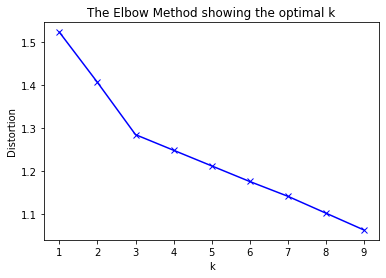

In [21]:
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(Z)
    kmeanModel.fit(Z)
    distortions.append(sum(np.min(cdist(Z, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / Z.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [23]:
'''df = pd.DataFrame(Z)
df['category'] = km.labels_
colormap = { 0: 'red', 1: 'green', 2: 'blue'}
colors = results.apply(lambda row: colormap[row.category], axis=1)
ax = results.plot(kind='scatter', x=0, y=1, alpha=0.1, s=300, c=colors)
'''

AttributeError: 'KMeans' object has no attribute 'apply'

In [24]:
plt.figure('A', figsize=(7,7))

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

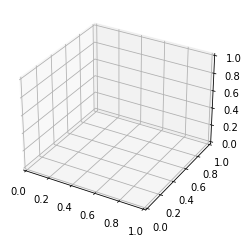

In [25]:
ax=plt.axes(projection='3d')

In [28]:
print(dummy.shape)

(120, 18)


In [30]:
!pip install mpl_toolkits

ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits


In [31]:
#from mpl_toolkits import plot3d
%matplotlib notebook

<IPython.core.display.Javascript object>


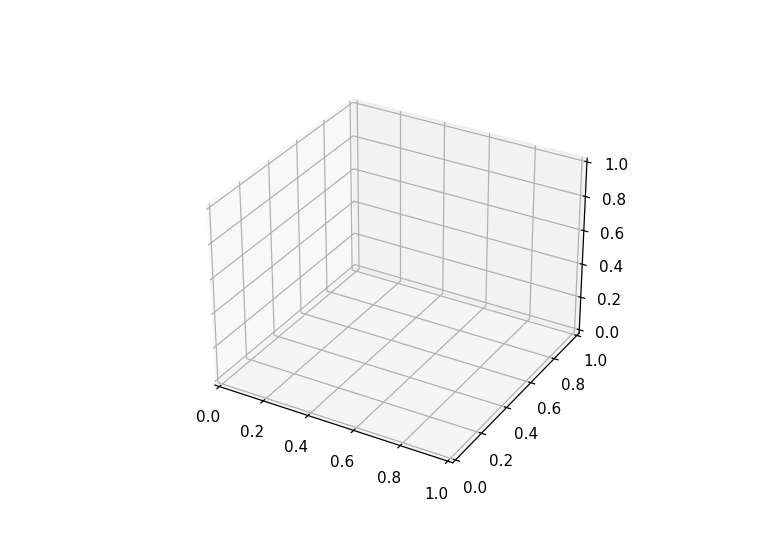

In [32]:
plt.figure("tmp", figsize=(7,5))
ax=plt.axes(projection='3d')


In [36]:
k_means_predicted=km.predict(Z)

ValueError: X has 18 features, but KMeans is expecting 17 features as input.